# <center> **Intrusion Detection System (IDS) Project** <center> 

* ## DataSet : [UNSW-NB15](https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15?select=UNSW_NB15_testing-set.csv)

## 1. To Detect Intrusion

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

In [182]:
training_dataset = "/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv"
df = pd.read_csv(training_dataset,index_col='id')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             82332 no

In [184]:
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [185]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [186]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

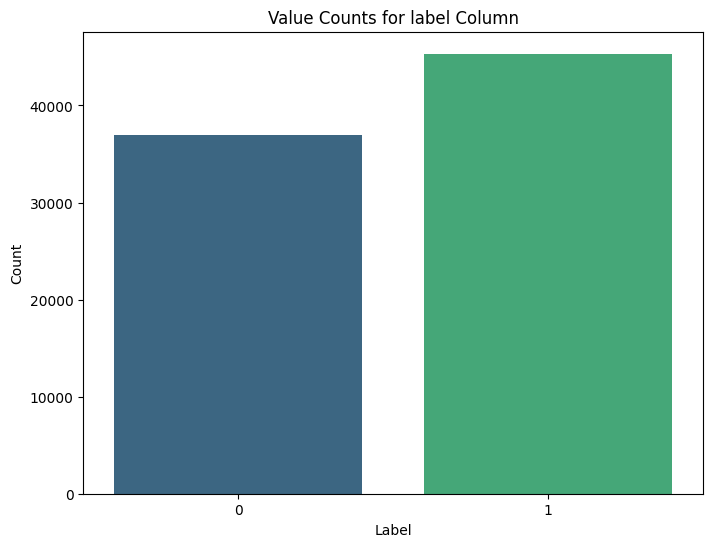

In [187]:
value_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Value Counts for label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


* # Data Preprocessing:
* #### One-Hot-Encoding

In [188]:
columns_of_interest = ['proto', 'service', 'state', 'attack_cat']

for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in proto: ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crt

In [189]:
data = pd.get_dummies(df, columns = columns_of_interest)
data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [190]:
data.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'attack_cat_Analysis', 'attack_cat_Backdoor', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic',
       'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms'],
      dtype='object', length=201)

In [191]:
acts = ['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
list_acts = []
for act in acts:
    fullname = 'attack_cat_'+act
    list_acts.append(fullname)
list_acts.append('label')
print(list_acts)
print(len(list_acts))

['attack_cat_Normal', 'attack_cat_Reconnaissance', 'attack_cat_Backdoor', 'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Analysis', 'attack_cat_Fuzzers', 'attack_cat_Worms', 'attack_cat_Shellcode', 'attack_cat_Generic', 'label']
11


In [192]:
y = data['label']
X = data.drop(list_acts, axis=1)
print(y.shape)
print(X.shape)

(82332,)
(82332, 190)


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(65865, 190)
(65865,)
(16467, 190)
(16467,)


* # Using Random Forest To Detect Intrusion

In [194]:
to_detect_intrusion = RandomForestClassifier(n_estimators=100, random_state=42)
to_detect_intrusion.fit(X_train, y_train)
y_pred = to_detect_intrusion.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7418
           1       0.98      0.97      0.98      9049

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467

[[7270  148]
 [ 238 8811]]


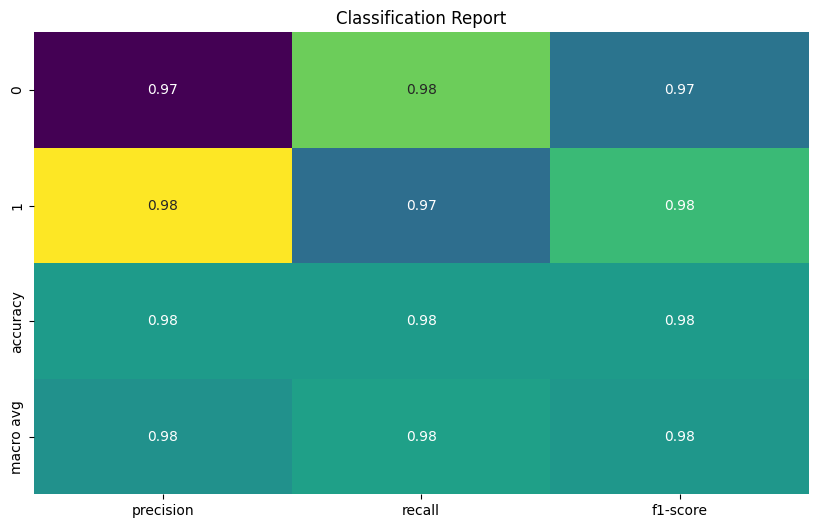

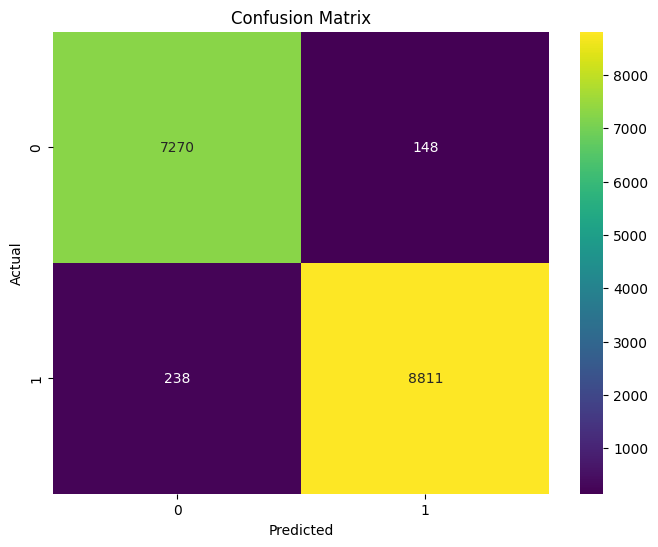

In [195]:
def plot_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', cbar=False)
    plt.title('Classification Report')
    plt.show()
def plot_confusion_matrix(y_true, y_pred, target_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
target_names = df['label'].unique()
y_pred = to_detect_intrusion.predict(X_test)
plot_classification_report(y_test, y_pred, target_names)
plot_confusion_matrix(y_test, y_pred, target_names)

# 2. To Detect Intrusion Types

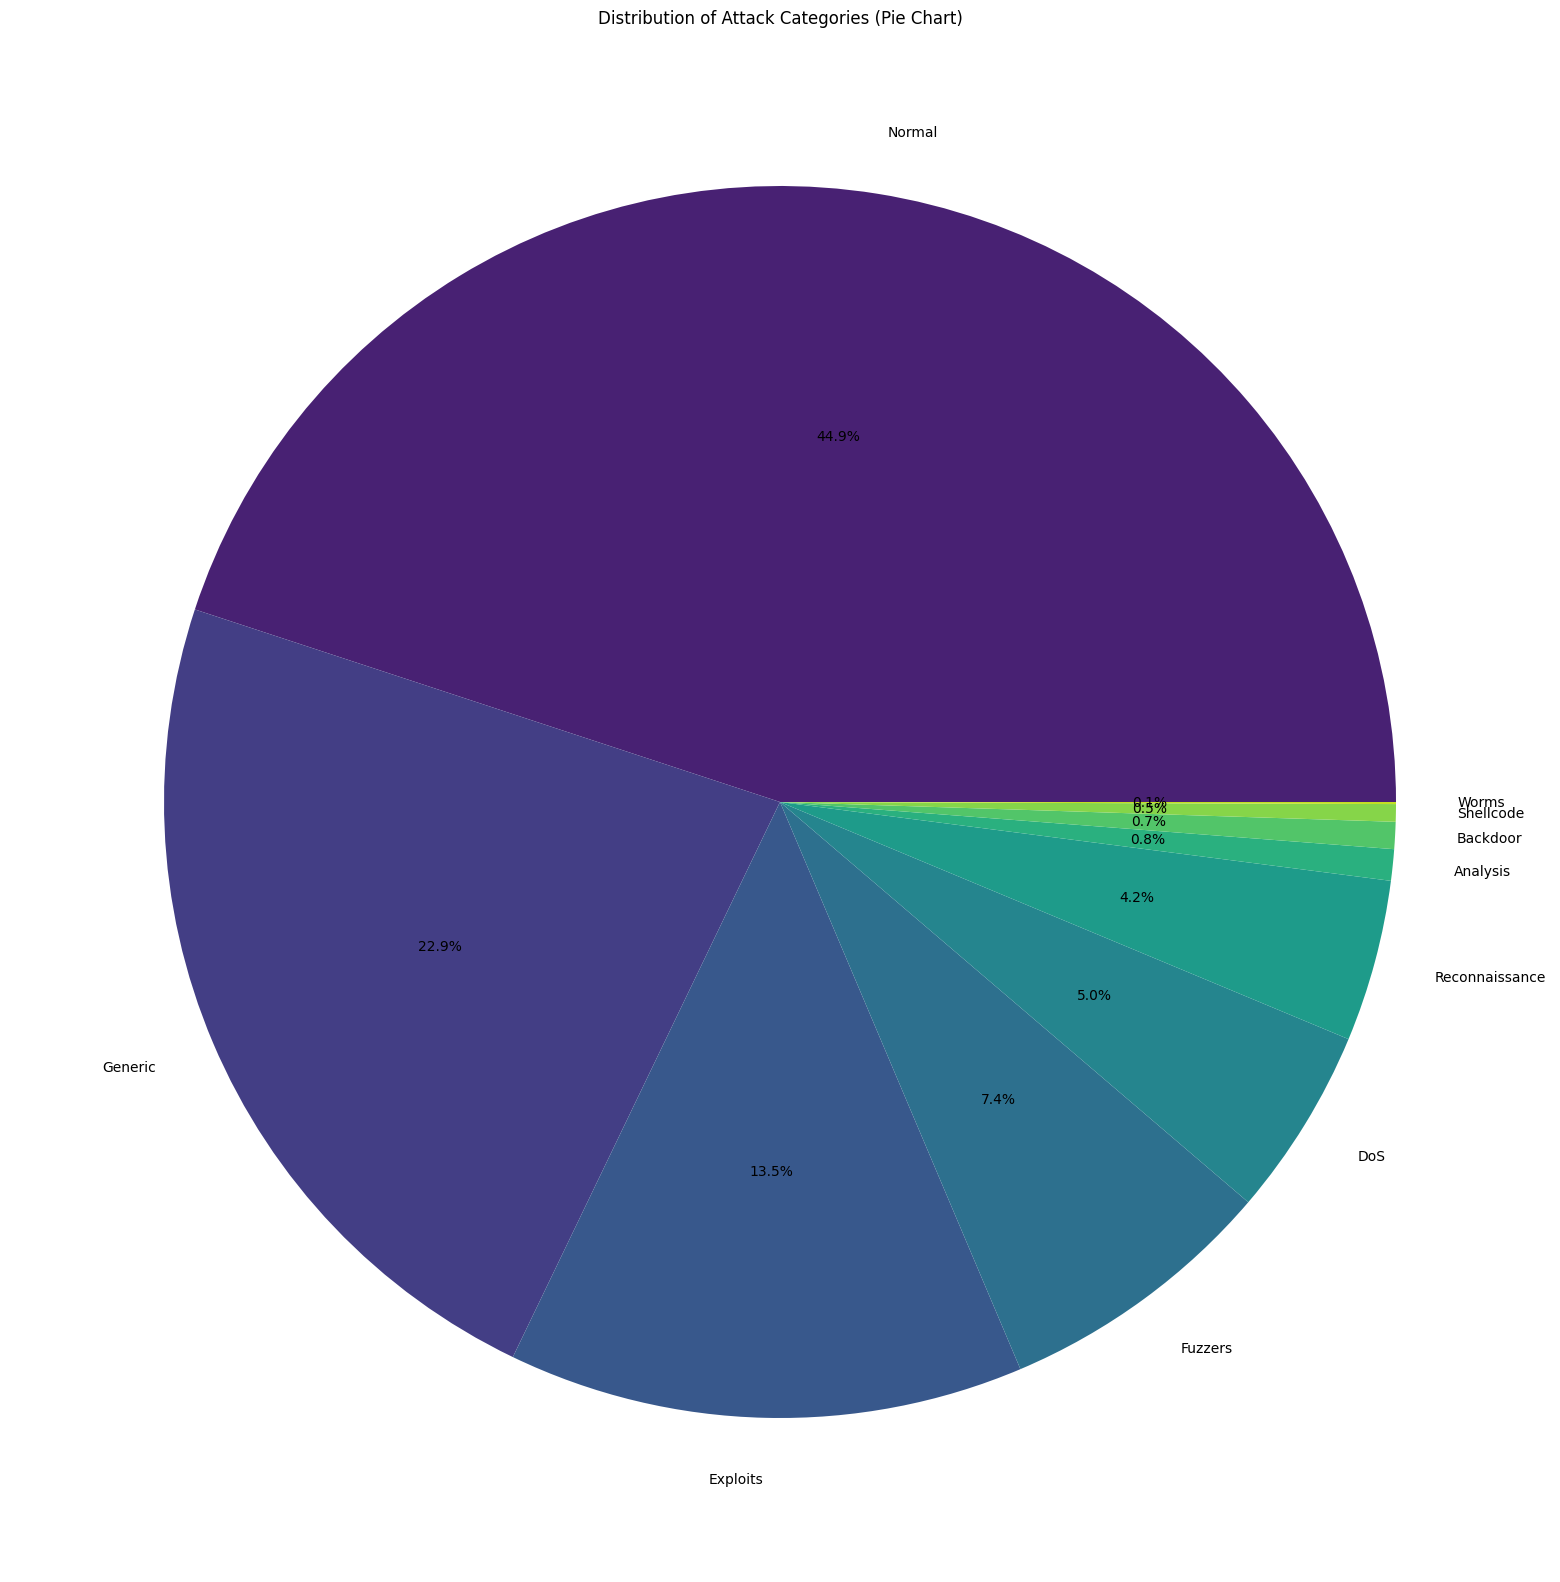

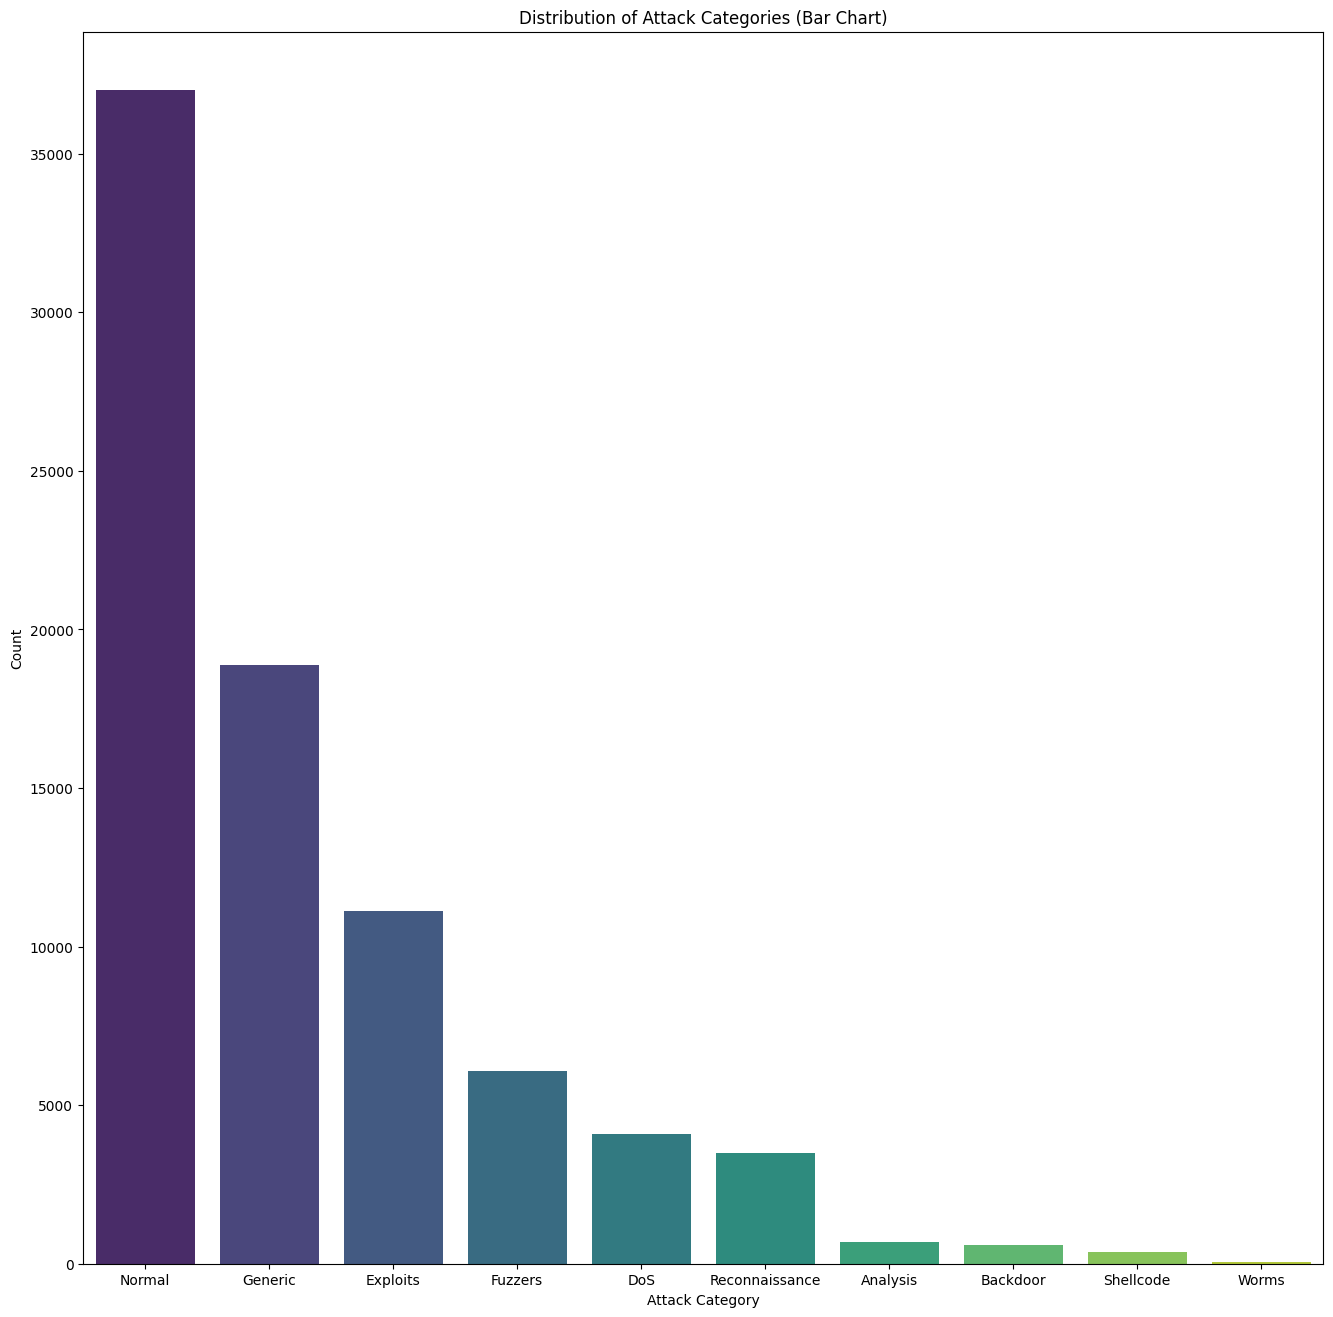

In [196]:
value_counts = df['attack_cat'].value_counts()

# pie chart
plt.figure(figsize=(20, 20))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(value_counts)))
plt.title('Distribution of Attack Categories (Pie Chart)')
plt.show()

# bar chart
plt.figure(figsize=(16, 16))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Distribution of Attack Categories (Bar Chart)')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()

In [197]:
data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [198]:
data.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'attack_cat_Analysis', 'attack_cat_Backdoor', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic',
       'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms'],
      dtype='object', length=201)

In [199]:
acts = ['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
list_acts = []
for act in acts:
    fullname = 'attack_cat_'+act
    list_acts.append(fullname)
print(list_acts)

['attack_cat_Normal', 'attack_cat_Reconnaissance', 'attack_cat_Backdoor', 'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Analysis', 'attack_cat_Fuzzers', 'attack_cat_Worms', 'attack_cat_Shellcode', 'attack_cat_Generic']


In [200]:
y = data[list_acts]
X = data.drop(list_acts, axis=1)
X = X.drop('label',axis=1)
print(y.shape)
print(X.shape)

(82332, 10)
(82332, 190)


* # Using Random Forest To Detect Intrusion Types

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
detect_attack_type =MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
detect_attack_type.fit(X_train, y_train)
y_pred = detect_attack_type.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7418
           1       0.97      0.74      0.84       723
           2       1.00      0.01      0.02       117
           3       0.35      0.13      0.19       786
           4       0.83      0.64      0.72      2275
           5       0.83      0.04      0.07       131
           6       0.92      0.58      0.72      1212
           7       1.00      0.00      0.00         7
           8       0.68      0.31      0.42        75
           9       1.00      0.97      0.98      3723

   micro avg       0.94      0.83      0.89     16467
   macro avg       0.85      0.44      0.49     16467
weighted avg       0.92      0.83      0.86     16467
 samples avg       0.95      0.83      0.83     16467



In [203]:
def plot_confusion_matrix(y_true, y_pred, label):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {label}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


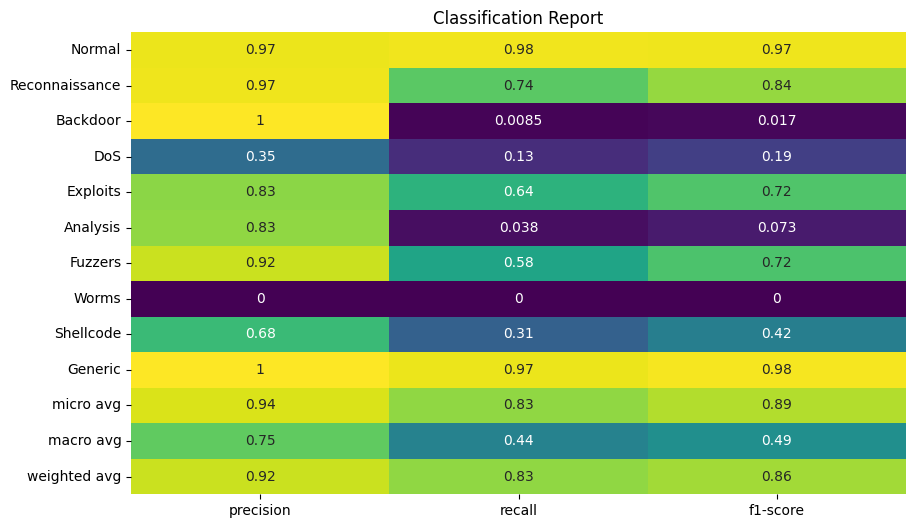

Confusion matrix for attack_cat_Normal:


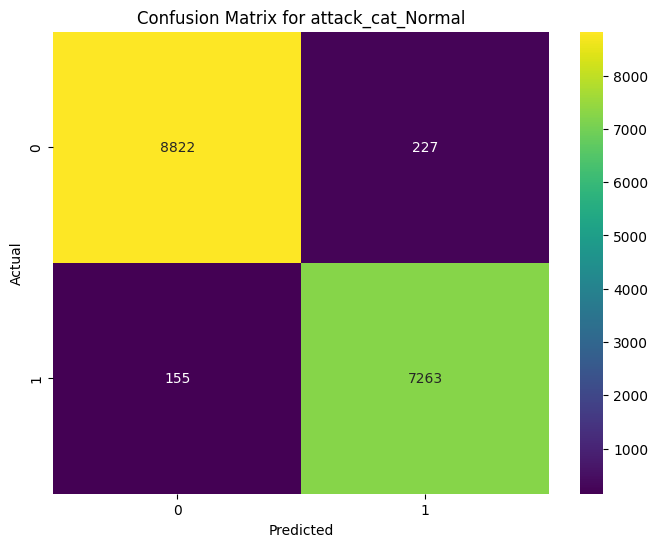

Confusion matrix for attack_cat_Reconnaissance:


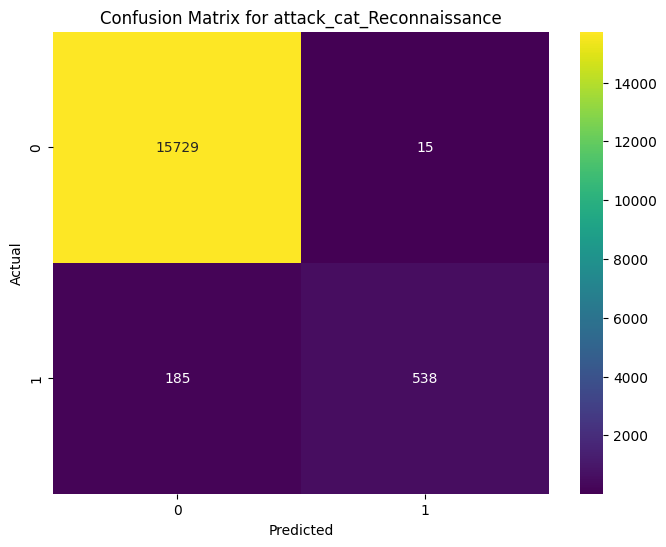

Confusion matrix for attack_cat_Backdoor:


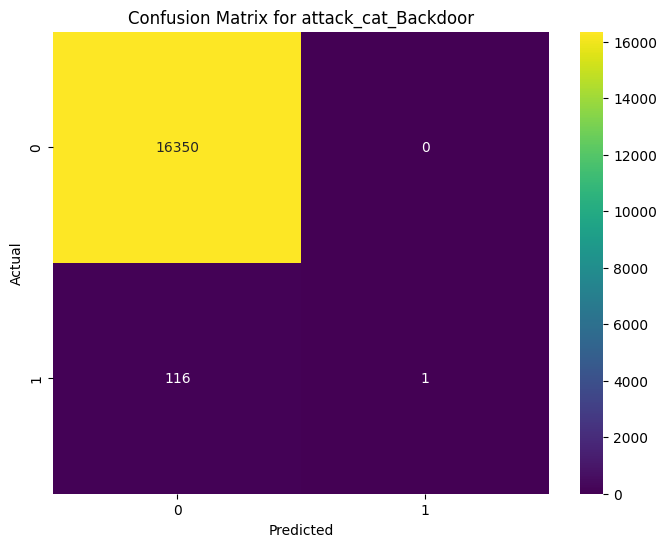

Confusion matrix for attack_cat_DoS:


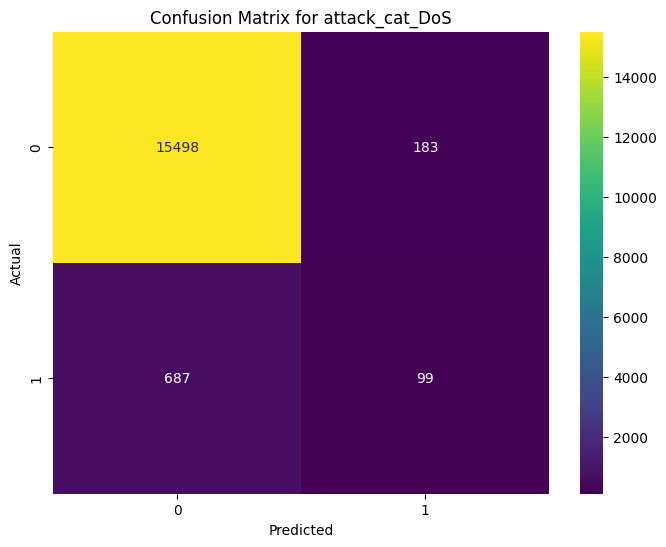

Confusion matrix for attack_cat_Exploits:


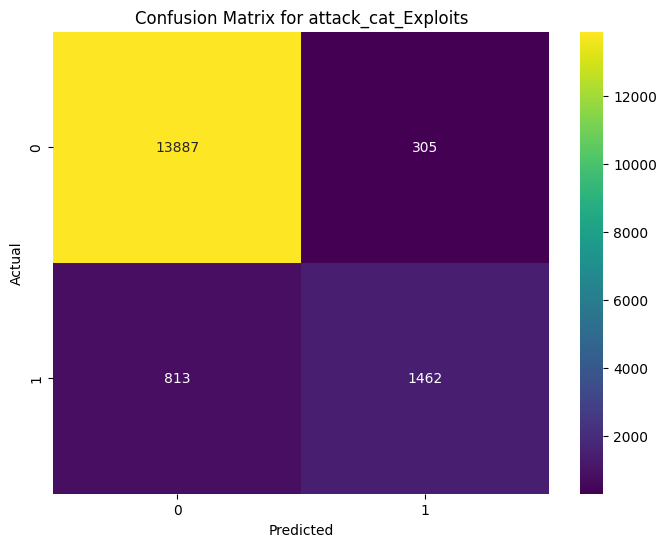

Confusion matrix for attack_cat_Analysis:


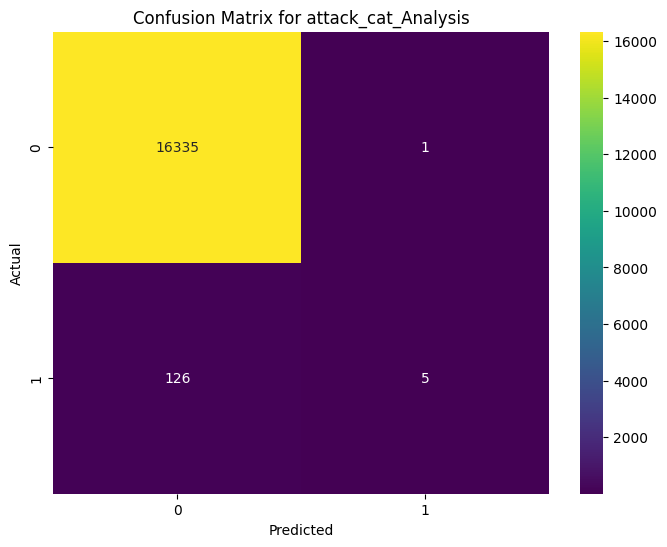

Confusion matrix for attack_cat_Fuzzers:


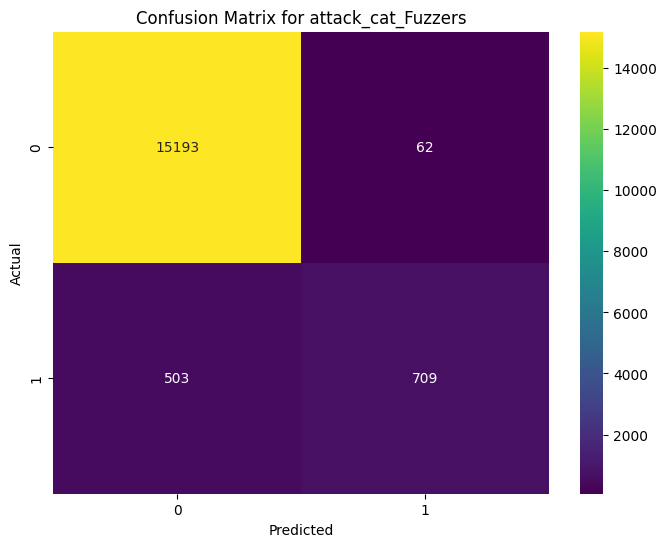

Confusion matrix for attack_cat_Worms:


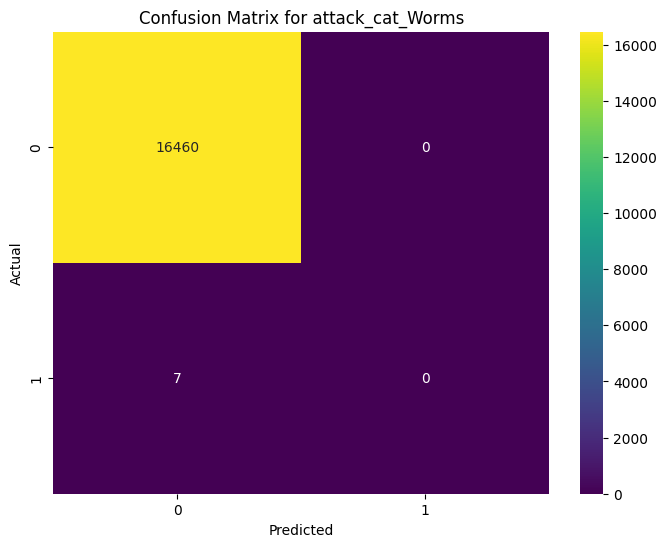

Confusion matrix for attack_cat_Shellcode:


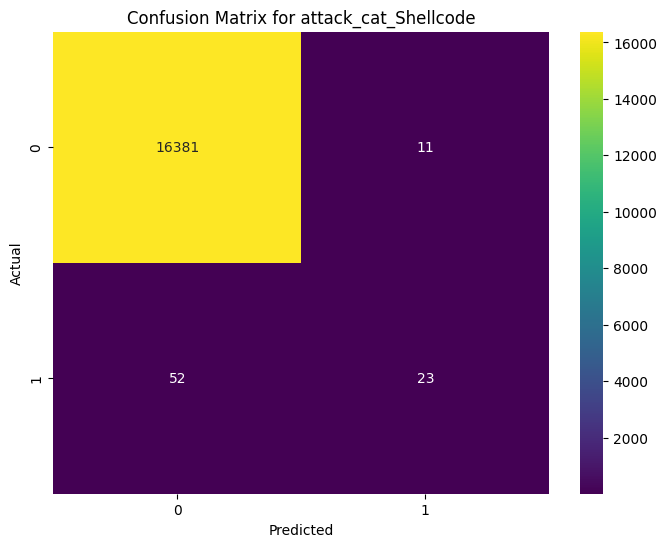

Confusion matrix for attack_cat_Generic:


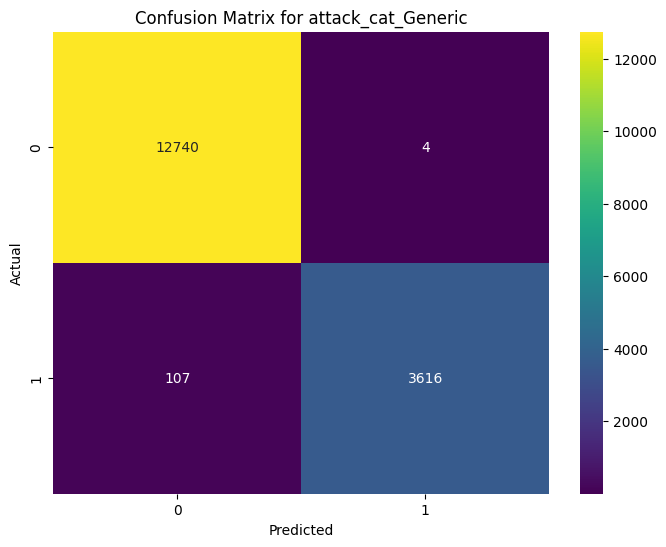

In [204]:
target_names = df['attack_cat'].unique()
y_pred = detect_attack_type.predict(X_test)
plot_classification_report(y_test, y_pred, target_names)
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)
for col in y_test.columns:
    print(f'Confusion matrix for {col}:')
    plot_confusion_matrix(y_test[col], y_pred_df[col], col)

# Try Out Some Example

In [225]:
X_test.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
id,,,,,,,,,,,,,,,,,,,,,
38667,1.292678,52,54,2934,3740,81.226725,31,29,1.781109e+04,22718.728520,...,False,False,False,False,False,False,True,False,False,False
56461,0.000007,2,0,114,0,142857.140900,254,0,6.514286e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
16267,0.000010,2,0,114,0,100000.002500,254,0,4.560000e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
75604,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,False,False,False,False,False,False,False,True,False,False
11201,0.189998,10,6,1460,268,78.948199,254,252,5.532690e+04,9431.677734,...,False,False,False,False,False,False,True,False,False,False


In [226]:
def prediction(inputs):
    intrusion_det = to_detect_intrusion.predict(inputs)
    print(f'Intrusion Detected: {intrusion_det}')
    if intrusion_det == [1]:
        intrusion_type = detect_attack_type.predict(inputs)
        label_names = ['Normal', 'Reconnaissance', 'Backdoor',
                   'DoS', 'Exploits', 'Analysis',
                   'Fuzzers', 'Worms', 'Shellcode',
                   'Generic']
        intrusion_labels = [label_names[i] for i, value in enumerate(intrusion_type[0]) if value]
        print(f"Intrusion Type : {intrusion_labels}")

In [235]:
v = 99
i, j = v, v+1
inputs = X_test.iloc[i:j]
df.loc[df.index == inputs.index[0]]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
36996,0.145831,tcp,-,FIN,84,86,4862,79882,1158.875655,31,...,1,3,0,0,0,7,3,0,Normal,0


In [236]:
prediction(inputs)

Intrusion Detected: [0]
